In [1]:
import pandas as pd

a = pd.read_excel (r'I:\Pattern Lab\Project\reading_hobby.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'
a.head()

,Gender,CGPA,Reading_Hobby
1,1,3.71,no
2,1,3.48,no
3,1,2.90,no
4,0,3.33,yes
5,1,3.72,no


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
a['Reading_Hobby'] = a['Reading_Hobby'].astype('category')
a.Reading_Hobby = a.Reading_Hobby.cat.rename_categories([0,1])
a

,Gender,CGPA,Reading_Hobby
1,1,3.710,0
2,1,3.480,0
3,1,2.900,0
4,0,3.330,1
5,1,3.720,0
6,1,3.430,1
7,0,3.270,0
8,0,3.000,0
9,0,3.420,1
10,0,3.640,1


In [13]:
D=a.values
# Get the labelled set
c1=D[:10,:]; c2=D[10:20,:];  c3=D[20:30,:]
trainSet = np.concatenate((c1,c2,c3),axis=0)

# Get the testing set
c1 = D[30:50,:]; c2=D[50:80,:];  c3=D[80:,:]
testSet = np.concatenate((c1,c2,c3),axis=0)

print(trainSet.shape)
print(testSet.shape)

xTrain=trainSet[:,:-1]; yTrain=trainSet[:,-1]
xTest=testSet[:,:-1]; yTest=testSet[:,-1]

(30, 3)
(67, 3)


In [20]:
# create a knn classifier with K=5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(xTrain, yTrain.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
# Make predictions
yPred=clf.predict(xTest)
acc=accuracy_score(yTest.astype(int), yPred.astype(int))
print('Accuracy with 5 neighbours: ',acc)

Accuracy with 5 neighbours:  0.7761194029850746


In [22]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  

[[47  9]
 [ 6  5]]


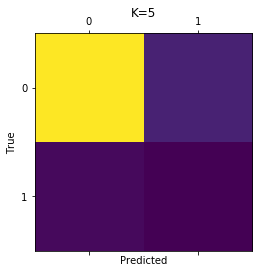

In [25]:
plot_conf_mat(yTest, yPred, 'K=5')